In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


# Data Descrption

Kumpulan data ini mencerminkan insiden kejahatan di Kota Los Angeles sejak tahun 2020. Data ini ditranskripsi dari laporan kejahatan asli yang diketik di atas kertas dan oleh karena itu mungkin ada beberapa ketidakakuratan dalam data tersebut. Kolom alamat hanya diberikan hingga blok ratusan terdekat untuk menjaga privasi. Data ini seakurat data dalam basis data.

Daftar Kolom : 
1. <b>DR_NO</b> <br>
Nomor Divisi Catatan: Nomor berkas resmi yang terdiri dari 2 digit pertama tahun, 1-2 digit ID area, dan 5 digit nomor lain-lain

2. <b> Date Reported </b><br>
Tanggal kejadian terlapor

3. <b> Date Occured </b> <br>
Tanggal terjadinya perkara

4. <b> Area </b> <br>
Area tempat terjadinya perkara

5. <b> Victim_age </b> <br>
Umur korban

6. <b>Victim_sex</b><br>
Jenis kelamin korban

7. <b>Victim_descent</b><br>
Ras korban : A - Other Asian , B - Black, C - Chinese, D - Cambodian, F - Filipino, G - Guamanian, H - Hispanic/Latin/Mexican, I - American Indian/Alaskan Native, J - Japanese, K - Korean, L - Laotian, O - Other, P - Pacific Islander, S - Samoan, U - Hawaiian, V - Vietnamese, W - White, X - Unknown, Z - Asian Indian
8. <b>Premis</b><br>
Jenis bangunan, kendaraan, atau lokasi di mana kejahatan terjadi.
9. <b>Status</b><br>
Status kejadian perkara saat ini
10. <b>Location</b><br>
Area detail terjadinya kejadian perkara
11. <b>LON dan LAT</b><br>
Koordinat lokasi kejadian perkara


https://www.kaggle.com/datasets/kushsheth/los-angeles-police-department-lapd-crime-data

https://catalog.data.gov/dataset/crime-data-from-2020-to-present


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
import plotly.express as px
import time
import missingno as msno
from feature_engine.imputation import RandomSampleImputer

In [2]:
# Read Data
start_time = time.time()

data = pd.read_csv("Crime_Data_from_2020_to_Present.csv",nrows=1000000)
data

end_time=time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 1.9133117198944092 seconds


# Data Understanding

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974477 entries, 0 to 974476
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           974477 non-null  int64  
 1   Date_Reported   974477 non-null  object 
 2   Date_occured    974477 non-null  object 
 3   Time_occured    974477 non-null  int64  
 4   Area            974477 non-null  object 
 5   Crime_Code      974477 non-null  object 
 6   Victim_age      974477 non-null  int64  
 7   Victim_sex      838474 non-null  object 
 8   Victim_descent  838464 non-null  object 
 9   Premis          973893 non-null  object 
 10  Weapon          325782 non-null  object 
 11  Status          974477 non-null  object 
 12  LOCATION        974477 non-null  object 
 13  LAT             974477 non-null  float64
 14  LON             974477 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 111.5+ MB


In [4]:
# Identifikasi banyaknya nilai unique pada kolom "Weapon"
data.Weapon.nunique()

79

1) <b>Mengidentifikasi macam-macam senjata digunakan, hal ini ditujukan kenapa weapon banyak yang kosong</b>

In [5]:
data[data.isna().any(axis=1)]

,DR_NO,Date_Reported,Date_occured,Time_occured,Area,Crime_Code,Victim_age,Victim_sex,Victim_descent,Premis,Weapon,Status,LOCATION,LAT,LON
0,190326475,03/01/20 0:00,03/01/20 0:00,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/20 0:00,02/08/20 0:00,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/20 0:00,11/04/20 0:00,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/23 0:00,03/10/20 0:00,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974469,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,NaN,Invest Cont,22700 NAPA ST,34.2260,-118.6214
974471,242011172,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,Olympic,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",36,F,C,BAR/COCKTAIL/NIGHTCLUB,NaN,Invest Cont,3700 WILSHIRE BL,34.0617,-118.3066
974472,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,Wilshire,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,4000 W 23RD ST,34.0362,-118.3284
974474,241711348,07/19/2024 12:00:00 AM,07/19/2024 12:00:00 AM,757,Devonshire,TRESPASSING,0,X,X,MTA - ORANGE LINE - CHATSWORTH,NaN,Invest Cont,10000 OLD DEPOT PLAZA RD,34.2500,-118.5990


In [6]:
msno.matrix(data)

TypeError: type object got multiple values for keyword argument 'visible'

TypeError: type object got multiple values for keyword argument 'visible'

In [6]:
data.Weapon.value_counts().head(30).T

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    174296
UNKNOWN WEAPON/OTHER WEAPON                        35799
VERBAL THREAT                                      23786
HAND GUN                                           20076
SEMI-AUTOMATIC PISTOL                               7240
KNIFE WITH BLADE 6INCHES OR LESS                    6821
UNKNOWN FIREARM                                     6564
OTHER KNIFE                                         5863
MACE/PEPPER SPRAY                                   3728
VEHICLE                                             3238
ROCK/THROWN OBJECT                                  2731
PIPE/METAL PIPE                                     2462
BOTTLE                                              2412
FOLDING KNIFE                                       2258
STICK                                               2243
CLUB/BAT                                            2084
KITCHEN KNIFE                                       1918
AIR PISTOL/REVOLVER/RIFLE/BB GU

In [7]:
# Kolom "Victim Descedent"
data.Victim_descent.value_counts().head(10)

H    291256
W    195759
B    133656
X    101620
O     76222
A     20955
K      5581
F      4467
C      4161
J      1456
Name: Victim_descent, dtype: int64

<b> 2) Analisis kejahatan apa saja yang tidak terdeteksi "Weapons" nya </b>

In [8]:
# Seleksi data untuk kolom "Weapon" Null
df_miss_weapon = data[data['Weapon'].isnull()]

In [9]:
df_miss_weapon

,DR_NO,Date_Reported,Date_occured,Time_occured,Area,Crime_Code,Victim_age,Victim_sex,Victim_descent,Premis,Weapon,Status,LOCATION,LAT,LON
0,190326475,03/01/20 0:00,03/01/20 0:00,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/20 0:00,02/08/20 0:00,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/20 0:00,11/04/20 0:00,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/23 0:00,03/10/20 0:00,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974469,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,NaN,Invest Cont,22700 NAPA ST,34.2260,-118.6214
974471,242011172,08/20/2024 12:00:00 AM,08/17/2024 12:00:00 AM,2300,Olympic,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",36,F,C,BAR/COCKTAIL/NIGHTCLUB,NaN,Invest Cont,3700 WILSHIRE BL,34.0617,-118.3066
974472,240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,Wilshire,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,4000 W 23RD ST,34.0362,-118.3284
974474,241711348,07/19/2024 12:00:00 AM,07/19/2024 12:00:00 AM,757,Devonshire,TRESPASSING,0,X,X,MTA - ORANGE LINE - CHATSWORTH,NaN,Invest Cont,10000 OLD DEPOT PLAZA RD,34.2500,-118.5990


In [10]:
# Berdasarkan Jenis Kejahatan ( Kolom "Crime_Code" )
df_miss_weapon.Crime_Code.value_counts().head(10)

VEHICLE - STOLEN                                            109035
THEFT OF IDENTITY                                            60269
BURGLARY FROM VEHICLE                                        57391
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      53136
BURGLARY                                                     50095
THEFT PLAIN - PETTY ($950 & UNDER)                           49054
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              38676
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          34980
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     31949
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     27771
Name: Crime_Code, dtype: int64

In [ ]:
# Berdasarkan Lokasi (Kolom "Premis")
df_miss_weapon.Premis.value_counts().head(10)

<b>3) Mengidentifikasi kategori pada kolom "Status"</b>

In [35]:
data.Status.value_counts()

Invest Cont     777945
Adult Other     106883
Adult Arrest     84629
Juv Arrest        3181
Juv Other         1832
UNK                  7
Name: Status, dtype: int64

## Statistik Deskriptif

In [11]:
# NUMERIK VALUE
data.describe()

,DR_NO,Time_occured,Victim_age,LAT,LON
count,9.744770e+05,974477.000000,974477.000000,974477.000000,974477.000000
mean,2.195654e+08,1338.771108,29.168748,33.995066,-118.079971
std,1.285558e+07,651.717033,21.954094,1.643523,5.696584
min,8.170000e+02,1.000000,-4.000000,0.000000,-118.667600
25%,2.106058e+08,900.000000,0.000000,34.014600,-118.430600
50%,2.208087e+08,1420.000000,30.000000,34.058900,-118.322500
75%,2.309064e+08,1900.000000,44.000000,34.164900,-118.273900
max,2.499253e+08,2359.000000,120.000000,34.334300,0.000000


In [12]:
# KATEGORIKAL VALUE
data.describe(include='object')

,Date_Reported,Date_occured,Area,Crime_Code,Victim_sex,Victim_descent,Premis,Weapon,Status,LOCATION
count,974477,974477,974477,974477,838474,838464,973893,325782,974477,974477
unique,1708,1707,21,139,5,20,306,79,6,66165
top,02/02/23 0:00,01/01/20 0:00,Central,VEHICLE - STOLEN,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,800 N ALAMEDA ST
freq,929,1153,67095,109088,394539,291256,250924,174296,777945,2513


# Feature Engineering

## Kolom "Weapon"

In [17]:
# Imputasi
data['Weapon'] = data['Weapon'].fillna('Unknown')

In [29]:
# Penyelarasan nilai value data fitur "Weapon"

# Mengubah value record
def label_items(item):
    item = str(item).upper()  # Convert the item to uppercase once
    if 'KNIFE' in item:
        return 'Knife'
    elif any(keyword in item for keyword in ['RIFLE', 'GUN', 'PISTOL', 'ASSAULT']):
        return 'Gun'
    elif 'STRONG' in item:
        return 'BODY-ARM'
    elif 'UNKNOWN' in item:
        return 'Unknown'
    return item  # If no conditions match, return the original item

In [30]:
# Pengaplikasian fungsi "label_items"
data['item'] = data['Weapon'].apply(label_items)

In [31]:
# Pengecekkan Data
data.item.value_counts().head(10)

Unknown               691936
BODY-ARM              174296
Gun                    32141
VERBAL THREAT          23786
Knife                  18588
MACE/PEPPER SPRAY       3728
VEHICLE                 3238
ROCK/THROWN OBJECT      2731
PIPE/METAL PIPE         2462
BOTTLE                  2412
Name: item, dtype: int64

<hr>

## Kolom "Victim_sex"

In [7]:
# Function to perform random sample imputation
def random_sample_imputer(df, column_name):
    # Get non-null values in the column
    non_null_values = df[column_name].dropna().values

    # Define a function to randomly sample from non-null values
    def impute_value(x):
        if pd.isnull(x):
            return np.random.choice(non_null_values)
        else:
            return x

    # Apply the impute_value function to the column
    df[column_name] = df[column_name].apply(impute_value)
    return df

In [8]:
# Imputasi pada kolom "Victim_sex"
df_imputed = random_sample_imputer(data, 'Victim_sex')

In [9]:
# Melakukan pengecekkan
df_imputed.isna().sum()

DR_NO                  0
Date_Reported          0
Date_occured           0
Time_occured           0
Area                   0
Crime_Code             0
Victim_age             0
Victim_sex             0
Victim_descent    136013
Premis               584
Weapon            648695
Status                 0
LOCATION               0
LAT                    0
LON                    0
dtype: int64

<hr>

## Kolom "Victim_descent"

In [10]:
# Imputasi pada kolom "Victim_descent"
df_imputed = random_sample_imputer(data, 'Victim_descent')

In [11]:
df_imputed.Victim_descent.value_counts().head(10)

H    338552
W    227566
B    155270
X    118196
O     88489
A     24393
K      6434
F      5178
C      4852
J      1675
Name: Victim_descent, dtype: int64

In [12]:
# Melakukan pengecekkan
df_imputed.isna().sum()

DR_NO                  0
Date_Reported          0
Date_occured           0
Time_occured           0
Area                   0
Crime_Code             0
Victim_age             0
Victim_sex             0
Victim_descent         0
Premis               584
Weapon            648695
Status                 0
LOCATION               0
LAT                    0
LON                    0
dtype: int64

<hr>

<b> Kolom "Premis" </b>

In [13]:
# Imputasi pada kolom "Premis"
df_imputed = random_sample_imputer(data, 'Premis')

In [14]:
df_imputed.Premis.value_counts().head(10)

STREET                                          251059
SINGLE FAMILY DWELLING                          161273
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    116842
PARKING LOT                                      67188
OTHER BUSINESS                                   46353
SIDEWALK                                         40391
VEHICLE, PASSENGER/TRUCK                         28422
GARAGE/CARPORT                                   18707
DRIVEWAY                                         15571
DEPARTMENT STORE                                 13540
Name: Premis, dtype: int64

In [15]:
# Melakukan pengecekkan
df_imputed.isna().sum()

DR_NO                  0
Date_Reported          0
Date_occured           0
Time_occured           0
Area                   0
Crime_Code             0
Victim_age             0
Victim_sex             0
Victim_descent         0
Premis                 0
Weapon            648695
Status                 0
LOCATION               0
LAT                    0
LON                    0
dtype: int64

## Label Encoding Kolom Kategorikal

In [36]:
from sklearn.preprocessing import LabelEncoder

# Copy the original dataset (replace df with your actual DataFrame)
df_encoded = df_imputed.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Loop through all the columns and apply Label Encoding for categorical columns
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

# Display the encoded DataFrame
print(df_encoded)


            DR_NO  Date_Reported  Date_occured  Time_occured  Area  \
0       190326475            297           297          2130    20   
1       200106753            195           190          1800     1   
2       200320258           1504          1475          1700    15   
3       200907217            651           342          2037    17   
4       220614831           1150          1142          1200     6   
...           ...            ...           ...           ...   ...   
974472  240710284           1027          1021          1400    20   
974473  240104953             74            74           100     1   
974474  241711348           1002          1001           757     2   
974475  240309674            572           571          1500    15   
974476  240910892           1127          1121          2300    17   

        Crime_Code  Victim_age  Victim_sex  Victim_descent  Premis  Weapon  \
0              133           0           3              12     266      77   
1  

# Visualisasi

## Analisa Senjata yang paling sering digunakan

In [21]:
top_10_weapons = df_imputed[~df_imputed['item'].isin(['Unknown'])]

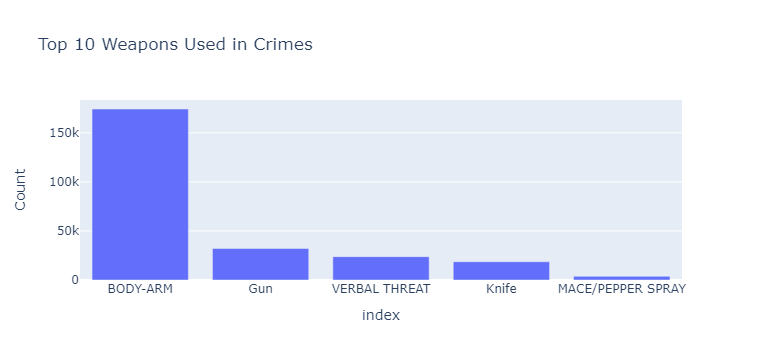

In [34]:
# Visualisasi "Weapon" yang digunakan untuk kejahatan tanpa kategori "Unknown"
top_10_weapons = df_imputed[~df_imputed['item'].isin(['Unknown'])]
top_5_weapons_selected = top_10_weapons.item.value_counts().head(5)

fig = px.bar(top_5_weapons_selected, x=top_5_weapons_selected.index, y=top_5_weapons_selected.values,
             labels={'x': 'Weapon', 'y': 'Count'},
             title='Top 10 Weapons Used in Crimes')
# fig.update_xaxes(tickangle=20)
fig.show()

## Lokasi yang sering terjadi Kejahatan

Kolom yang digunakan <code>Area</code>

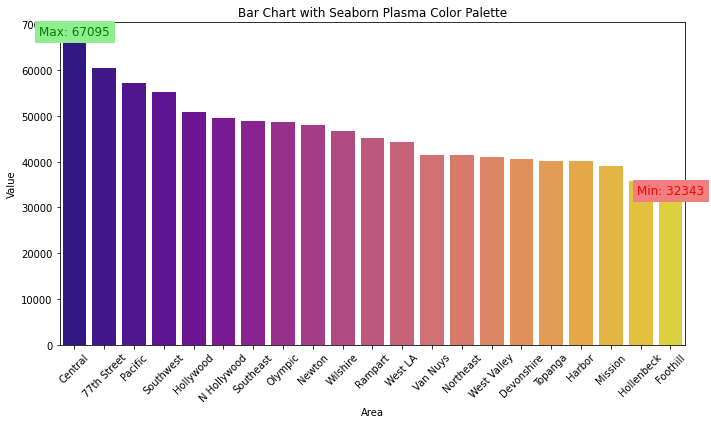

In [28]:
category_counts = df_imputed['Area'].value_counts().reset_index()
category_counts.columns = ['Area', 'Count']

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Area', y='Count', data=category_counts, palette="plasma")

# Customize the plot
plt.title("Bar Chart with Seaborn Plasma Color Palette")
plt.xlabel('Area')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Get the max and min values
max_value = category_counts['Count'].max()
min_value = category_counts['Count'].min()
max_category = category_counts.loc[category_counts['Count'] == max_value, 'Area'].values[0]
min_category = category_counts.loc[category_counts['Count'] == min_value, 'Area'].values[0]

# Add annotations for the highest bar (max)
plt.text(category_counts[category_counts['Area'] == max_category].index[0], max_value + 0.2, 
         f"Max: {max_value}", color='green', ha='center', va='bottom', fontsize=12, 
         backgroundcolor='lightgreen')

# Add annotations for the lowest bar (min)
plt.text(category_counts[category_counts['Area'] == min_category].index[0], min_value + 0.2, 
         f"Min: {min_value}", color='red', ha='center', va='bottom', fontsize=12, 
         backgroundcolor='lightcoral')

# Show the plot
plt.tight_layout()
plt.show()

## Korelasi Heatmap

# Modelling

In [ ]:
train_data = df_imputed[["","",""]]

In [ ]:
import time
from sklearn.cluster import KMeans
start_time = time.time()
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfmodel2013_2014)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Program execution time: {elapsed_time} seconds")